Osnabrück University - Machine Learning (Summer Term 2016) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 10

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, June 26, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Classifiers and SVM [6 Points]

In the lecture (ML-09 Slides 7ff) several types of classifiers have been introduced. In this assignment you will explore differences and similarities between them.

### a) LDA

How does the LDA classifier work? What restrictions have to be fullfilled by the data for this method to work and why?

### b) Nearest Neighbor

How does the nearest neighbor classifier work? When would you use it and how is it trained?

### c) Support Vector Machines

Name some differences between a SVM and a MLP. When would you use which?

## Assignment 2: Ultimate Dinosaur 3000 M4ze Xtrem!  [14 Points]

In this assignment you will have a look at the Q-Learning algorithm described in the lecture (ML-10 Slide 18). For this we generate a field with random rewards. A learning agent is then exploring the field and learns the optimal path to navigate through it. The code below is again filled with some ``TODO``s that should be filled by you in order to implement the Q-Learning algorithm. 

Below you also find a free-code field for a complete own implementation. You may use your own test mazes.

In [1]:
import numpy as np
import numpy.random as rand

def generate_field(x, y, num_rewards, max_reward):
    """
    Generate a random game field with rewards.
    
    Args:
        x            x dimension of the field
        y            y dimension of the field 
        num_rewards  the number of rewards that should be randomly placed
        max_reward   the maximum reward that can be placed 
        
    Returns:
        A field with randomly initialized rewards, the rest of the 
        entries is zero
    """
    field = np.zeros((y,x), dtype=np.uint8)
    
    for i in range(num_rewards):
        field[rand.randint(y), rand.randint(x)] = rand.choice(max_reward)
    
    return field

In [2]:
def softmax(x):
    """
    Softmax algorithm after the forumla: e^x/sum(e^x)
    """
    e_x = np.exp(x) 
    return e_x / e_x.sum()

In [3]:
def eps_greedy(e):
    """
    Epsilon greedy action selection.
    
    Args:
        e  the probability with which the action is randomly selected
    """
    if np.random.rand > e:
        pass
        #FIXME finish for sample solution
    return

In [4]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

class QLearning:
    """
    This class contains all the necessary methods to navigate through
    a maze or game with the help of a little bit of Q-Learning.
    """
    
    def __init__(self, field, actions, gamma):
        """
        Initializes the QLearning Algorithm with the necessary parameters.
        All q values are stored in self.q - this is an array that has
        ACTIONS x map_x x map_y dimensions to store a value for each action
        in each field. The starting position self.pos is randomly initialized.
        
        Args:
            field   the map
            actions the available actions
            gamma   the gamma in the lecture slides
        
        Returns:
            An instance that can be used for QLearning on the field
        """
        # q stores the q_values for each action in each space of the field.
        self.field = field
        self.actions = actions
        self.gamma = gamma
        
        # Remember the map extend for further navigation.
        self.map_y = self.field.shape[0]
        self.map_x = self.field.shape[1]
        
        # Create q value matrix.
        self.q = np.zeros((len(self.actions), self.map_y, self.map_x))

        # Start on a random position in the field.
        self.pos = [np.random.randint(self.map_y), np.random.randint(self.map_x)]


    def get_coordinates(self, position, choice):
        """
        Returns the coordinates that follow a certain choice, depending
        on the current position of the learner. If the border is reached
        the agent just stops there.
        
        Args:
            position the current position
            choice   the action that should be performed (one of: 'up', 'down', ...)
            
        Returns:
            the updated coordinates
        """
        # TODO return the right new coordinates depending on the position
        y_new = position[0]
        x_new = position[1]
        
        if   choice == 'left':  
            x_new -= 1 if x_new > 0 else 0
        elif choice == 'right': 
            x_new += 1 if x_new < self.map_x - 1 else 0            
        elif choice == 'up':    
            y_new -= 1 if y_new > 0 else 0                
        elif choice == 'down':  
            y_new += 1 if y_new < self.map_y - 1 else 0
        else: 
            raise ValueError('No such action: {}'.format(choice))
            
        return (y_new, x_new)


    def update(self):
        """
        Implementation of the update step. Closely follows the Algorithm described on
        ML-10 Sl.18. Note that the you have attributes available as specified in the
        __init__ method of this class, in addition to that is the FIELD variable that
        stores the real field the agent is iterating about, as well as ACTIONS which
        stores the available actions.
        """
        # TODO: Get the q-values for the current position of the player.
        qvals = self.q[:,self.pos[0], self.pos[1]]
        
        # Select next action and exectue it.
        # dist = softmax(np.asarray(qvals))
        
        # TODO: Select a random action that should be performed next.
        # Be careful to handle the case where you hit the wall!
        choice = np.random.choice(ACTIONS)#, p=dist)
        choice_i = self.actions.index(choice)
        new_pos = self.get_coordinates(self.pos, choice)
        # Step out when we hit a wall.
        if new_pos == self.pos:
            return self.q
             
        # TODO: Receive the reward for the new position.
        rew = self.field[new_pos[0], new_pos[1]]
        
        # TODO: Update the q-value for the performed action.
        self.q[choice_i, self.pos[0], self.pos[1]] = rew + self.gamma * max(self.q[:, new_pos[0], new_pos[1]])
        
        # TODO: Update the position of the player to the new field.
        self.pos = new_pos
        
        return self

    def plot(self):
        """
        Plots the current state.
        """
        fig_player = plt.figure('QLearning State')
    
        for i, direc in enumerate(ACTIONS):
            plt.subplot(3,3,2*i+2)
            plt.axis('off')
            plt.title(direc)
            plt.imshow(self.q[i,:,:], interpolation = 'None')

        fig_player.canvas.draw()

<IPython.core.display.Javascript object>


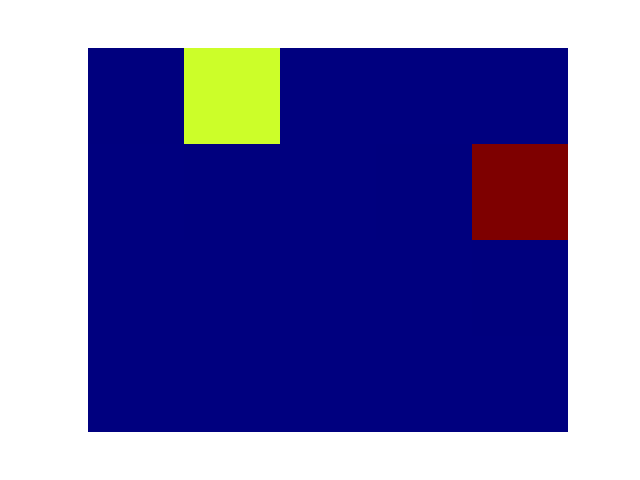

<IPython.core.display.Javascript object>


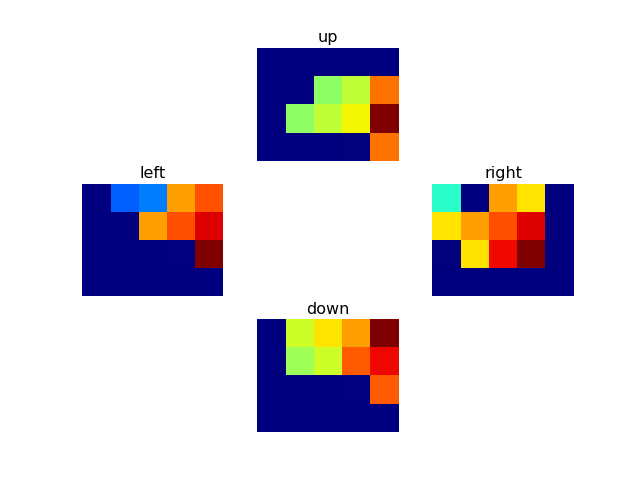

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt

# Determine the size of the field, change this parameters as you like
m_x = 5
m_y = 4

steps = 200

ACTIONS = ['up','left','right','down']  # Those are the availabe actions for the QLearning.
FIELD = generate_field(m_x, m_y, 5, 10) # The field that is used for learning.

# Plotting the generated field
figure = plt.figure('Field')
plt.axis('off')
plt.imshow(FIELD, interpolation='none')
figure.canvas.draw()

# TODO: Generate a QLearning instance with the right parameters.
player = QLearning(FIELD, ACTIONS, 0.9)

# Now we perform steps many learning iterations on the field with
# the generated QLearning instance.
for i in range(steps):     
    player.update()
    player.plot()

You are also free to write your complete own implementation of the QLearning algorithm. Use the following cell for your implementation.

In [6]:
# Your code goes here:
import numpy as np

maze = np.array([[0, 0, 1], [0, 0, 0]])
actions = [lambda c : (c[0], c[1] + 1),
           lambda c : (c[0], c[1] - 1),
           lambda c : (c[0] - 1, c[1]),
           lambda c : (c[0] + 1, c[1])]

def move(pos, direction):
    new_pos = actions[direction](pos)
    for dim, c in enumerate(new_pos):
        if c < 0 or c >= maze.shape[dim]:
            raise ValueError('Action impossible.')
    return new_pos

# (Initialize parameters)
gamma = 0.9

# Initialize q(s, a) <- 0
q = np.zeros((np.prod(maze.shape), len(actions)))

# Observe current state s
position = (0, 0)
s = np.ravel_multi_index(position, maze.shape)

# Repeat
for iteration in range(10000):
    # Select action a
    a = np.random.randint(len(actions))
    # Execute action a (if possible)
    try:
        position = move(position, a)
    except ValueError:
        continue

    # Receive reward r
    r = maze[position]
    # Observe new state s_n
    s_n = np.ravel_multi_index(position, maze.shape)

    # Update q(s, a)
    q[s, a] = r + gamma * np.max(q[s_n, :])

    # Update s
    s = s_n